# [Lab 1] Non-regularized regression


### 1) Read the dataset given in the provided file data lab1.txt and plot the output value as a function of the input data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("data_lab1.txt")

In [3]:
split = 70
np.random.shuffle(data)
train, test = data[:split],data[split:]

Text(0.5, 1.0, 'data_lab1')

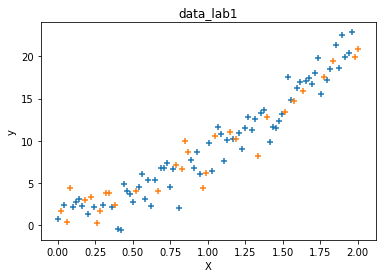

In [4]:
X_train = train[:,0]
y_train = train[:,1]
X_test = test[:,0]
y_test = test[:,1]

plt.scatter(X_train,y_train,marker="+")
plt.scatter(X_test,y_test,marker="+")
plt.xlabel("X")
plt.ylabel("y")

plt.title("data_lab1")


In [4]:
X0 = np.zeros(X_test.size)+1
X_test = np.stack((X0,X_test), axis=1)
X0 = np.zeros(X_train.size)+1
X_train = np.stack((X0,X_train), axis=1)

In [5]:
X_train.shape

(70, 2)

### 2) Fit the univariate linear regression parameters to the dataset using batch gradient descent. What are the optimal values of the parameters?

In [1]:
def hypothesis(X, thetas): #X= inputs, theta0= parameter 0 , theta1= parameter 1
    return X*thetas[1] + thetas[0] # cf lecture1 (equation of a line: ax +b)

def cost_fct(y,predictions): #y: groundtruth (data_lab1) ,predictions: application of our hypothesis over our inputs
    return (1/2)*np.sum(np.square(predictions-y)) # cf lecture1, what we want to minimize
    

def gradient_descent(X, y, thetas, alpha, epsilon): #alpha: learning rate, epsilon: we stop when the cost converge (the difference between last two cost < epsilon)
    cost = 10000000 #inf
    cost_prev = 1
    past_costs = [] #save values to make evolution graphs later
    past_theta0 = [] #save values to make evolution graphs later
    past_theta1 = []
    n_iter=0
    while (epsilon < abs(cost - cost_prev)): #cf leacture1, until convergence of cost
        n_iter+=1 #save for stats
        predictions = hypothesis(X[:,1], thetas) #calculate predictions
        
        cost_prev = cost #save old cost
        cost = cost_fct(y,predictions) #calculate new cost
        past_costs.append(cost)
        
        #print("cost=",cost," eps=", abs(cost - cost_prev)," error = ",np.sum((predictions - y)))
        for n in range (np.size(X,1)):
            thetas[n] = thetas[n] - (alpha*np.sum((predictions - y)*X[:,n]))
        past_theta0.append(thetas[0])
        past_theta1.append(thetas[1])
    return thetas,past_theta0,past_theta1,past_costs,n_iter

Text(0, 0.5, 'y')

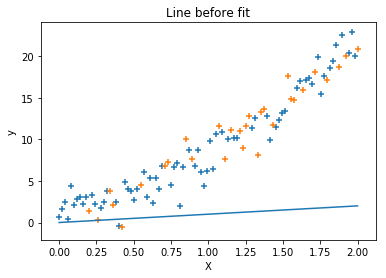

In [6]:
alpha = 0.001 #Step size
epsilon = 0.001 #Difference between last two costs (is the model is improving?)
thetas = np.array([0.0,1.0])

plt.title("Line before fit")

x=np.arange(3)
plt.plot(x,x*thetas[1]+thetas[0])

plt.scatter(X_train[:,1],y_train,marker="+")
plt.scatter(X_test[:,1],y_test,marker="+")
plt.xlabel("X")
plt.ylabel("y")

In [7]:
thetas,past_theta0,past_theta1, past_costs,n_iter = gradient_descent(X_train, y_train, thetas, alpha, epsilon)
print("Iteration =", n_iter, "Theta 1 =", thetas[1], " Theta 0 =", thetas[0])
save = np.array([thetas[0],thetas[1]])

Iteration = 360 Theta 1 = 10.026043410816671  Theta 0 = -0.6798390964329111


Text(0, 0.5, 'y')

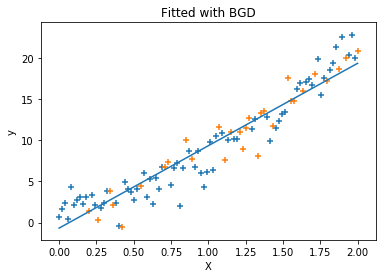

In [8]:
plt.title("Fitted with BGD")
x=np.arange(3)
plt.plot(x,x*thetas[1]+thetas[0])
plt.scatter(X_train[:,1],y_train,marker="+")
plt.scatter(X_test[:,1],y_test,marker="+")
plt.xlabel("X")
plt.ylabel("y")

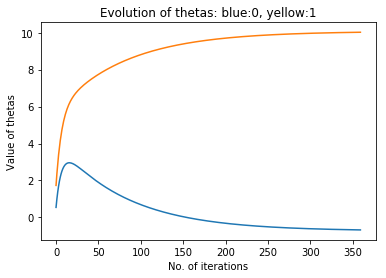

In [9]:
plt.title('Evolution of thetas: blue:0, yellow:1')
plt.xlabel('No. of iterations')
plt.ylabel('Value of thetas')
plt.plot(past_theta0)
plt.plot(past_theta1)

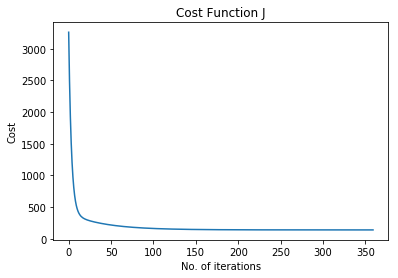

In [10]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)

### 3) Fit the univariate linear regression parameters to the dataset using stochastic gradient descent. What are the optimal values of the parameters?

In [11]:
import random
def stochastic_gradient_descent(X, y, thetas, alpha,n_iter=1500): #alpha: learning rate, epsilon: we stop when the cost converge (the difference between last two cost < epsilon)
    cost = 10000000 #inf
    cost_prev = 1
    past_costs = [] #save values to make evolution graphs later
    past_theta0 = [] #save values to make evolution graphs later
    past_theta1 = [] #save values to make evolution graphs later
    for z in range(n_iter):
        i = random.randint(0,X.shape[0]-1)
        for n in range (np.size(X,1)):
            predictions = hypothesis(X[i,1], thetas) #calculate predictions

            cost_prev = cost #save old cost
            cost = cost_fct(y,predictions) #calculate new cost
            past_costs.append(cost)

            #print("cost=",cost," eps=", abs(cost - cost_prev)," error = ",np.sum((predictions - y)))

            thetas[n] = thetas[n] - (alpha*(predictions - y[i])*X[i,n]) #cf lecture1, update rule for theta 1
        past_theta0.append(thetas[0])
        past_theta1.append(thetas[1])
    return thetas,past_theta0,past_theta1,past_costs,n_iter

Text(0, 0.5, 'y')

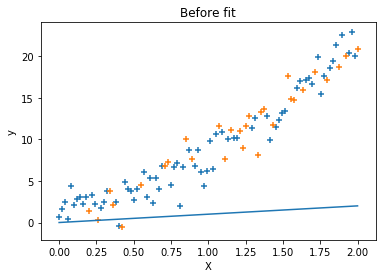

In [12]:
alpha = 0.01 #Step size
thetas = np.array([0.0,1.0])

plt.title("Before fit")
x=np.arange(3)
plt.plot(x,x*thetas[1]+thetas[0])
plt.scatter(X_train[:,1],y_train,marker="+")
plt.scatter(X_test[:,1],y_test,marker="+")
plt.xlabel("X")
plt.ylabel("y")

In [13]:
thetas,past_theta0,past_theta1, past_costs,n_iter = stochastic_gradient_descent(X_train, y_train, thetas, alpha)
print("Iteration =", n_iter, "Theta 1 =", thetas[1], " Theta 0 =", thetas[0])
save = np.concatenate((save,[thetas[0],thetas[1]]),  axis=0)

Iteration = 1500 Theta 1 = 9.921844163273523  Theta 0 = -0.5180366731958617


Text(0, 0.5, 'y')

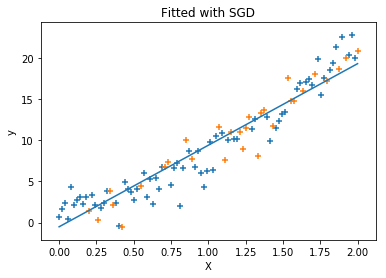

In [14]:
plt.title("Fitted with SGD")
x=np.arange(3)
plt.plot(x,x*thetas[1]+thetas[0])
plt.scatter(X_train[:,1],y_train,marker="+")
plt.scatter(X_test[:,1],y_test,marker="+")
plt.xlabel("X")
plt.ylabel("y")

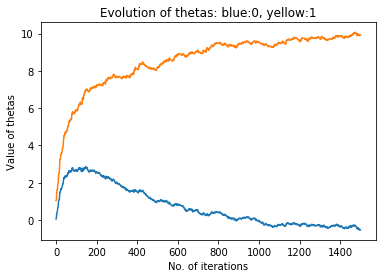

In [15]:
plt.title('Evolution of thetas: blue:0, yellow:1')
plt.xlabel('No. of iterations')
plt.ylabel('Value of thetas')
plt.plot(past_theta0)
plt.plot(past_theta1)

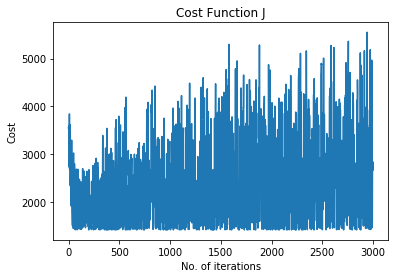

In [16]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)

### 4) Fit the univariate linear regression parameters to the dataset using the closed-form method. What are the optimal values of the parameters?

In [17]:
from numpy.linalg import inv
def closed_form(X, y):
    thetas = np.dot(np.dot(inv(np.dot(X.T,X)),X.T),(y))
    return thetas

In [18]:
thetas = closed_form(X_train, y_train)
print("Theta 1 =", thetas[1], " Theta 0 =", thetas[0])
save = np.concatenate((save,[thetas[0],thetas[1]]),  axis=0)

Theta 1 = 10.078987676768083  Theta 0 = -0.7396049680702542


Text(0, 0.5, 'y')

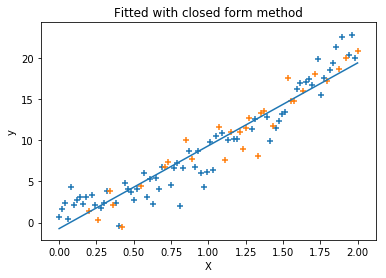

In [19]:
plt.title("Fitted with closed form method")
x=np.arange(3)
plt.plot(x,x*thetas[1]+thetas[0])
plt.scatter(X_train[:,1],y_train,marker="+")
plt.scatter(X_test[:,1],y_test,marker="+")
plt.xlabel("X")
plt.ylabel("y")

### 5) Plot the linear regressors obtained in 2), 3) and 4) over the original dataset.

In [20]:
save=save.reshape((3, 2))
save

array([[-0.6798391 , 10.02604341],
       [-0.51803667,  9.92184416],
       [-0.73960497, 10.07898768]])

In [42]:
def mse(X,y,thetas):
    predictions = hypothesis(X[:,1],thetas)
    return (1/y.size)*np.sum(np.square(predictions-y))

In [43]:
y_test.size

30

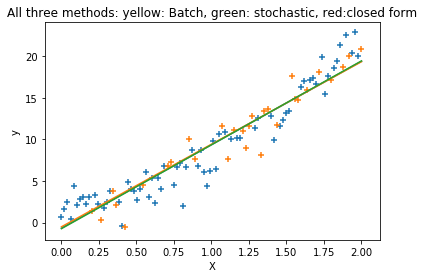

In [48]:
plt.title("All three methods: yellow: Batch, green: stochastic, red:closed form")
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(X_train[:,1],y_train,marker="+")
plt.scatter(X_test[:,1],y_test,marker="+")
x=np.arange(3)
MSE = []
for i in range (np.size(save,0)):
    plt.plot(x,x*save[i,1]+save[i,0])
    MSE = np.append(MSE,mse(X_test, y_test,save[i]))
    

### 6) Test your model choosing yourself some new input data. Plot also these results.

In [49]:
MSE

array([2.87061263, 2.93450078, 2.84874454])

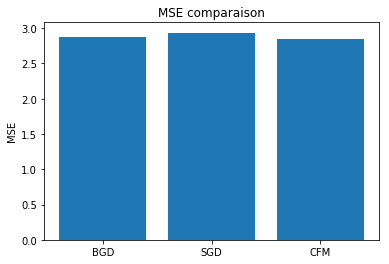

In [50]:
plt.title("MSE comparaison")
plt.ylabel("MSE")
plt.bar(x, MSE)
plt.xticks(x, ('BGD', 'SGD', 'CFM'))
plt.show()